 https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/  | https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift 


In [10]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from cycler import cycler

from sqlalchemy import create_engine
from matplotlib.backends.backend_pdf import PdfPages
from functions.cluster_analysis import clusterplot
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift  
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

In [11]:
credentials = ast.literal_eval(open(r"C:\Users\pvilas\OneDrive - unizar.es\Python\credentials.txt", "r").read())
sql_engine = create_engine(credentials['sqlalchemy'][0]+ 'IndexSustainabilityLevel')

df_position = pd.read_sql('YearlyPositionVar', con = sql_engine)
df_position = df_position.loc[df_position["Year"]=="All period"].set_index('IndexTicker')
indices_details = pd.read_sql('EquityIndexDetails', sql_engine)
indices_details= indices_details[~indices_details['Ticker'].isin(['LS&PMIDC', 'LEUNX150'])] 

In [12]:
df_position = df_position.rename(dict(zip(indices_details.Ticker, indices_details.Name)), axis=0)

list_df = [
          df_position.loc[:, ['EsgScoreExclusionsMean','EsgScoreExclusionsVar', 
                               'CombinedScoreExclusionsMean', 'CombinedScoreExclusionsVar',
                               'MarketValueUsdExclusionsMean',  'MarketValueUsdExclusionsVar', 'IndexType' ]], 
          df_position.loc[:, ['EsgScoreInclusionsMean',  'EsgScoreInclusionsVar', 
                              'CombinedScoreInclusionsMean','CombinedScoreInclusionsVar', 
                              'MarketValueUsdInclusionsMean','MarketValueUsdInclusionsVar', 'IndexType']],
          df_position.loc[:, ['EsgScoreExclusionsMean','EsgScoreExclusionsVar', 
                              'CombinedScoreExclusionsMean', 'CombinedScoreExclusionsVar',
                              'MarketValueUsdExclusionsMean', 'MarketValueUsdExclusionsVar', 
                              'EsgScoreInclusionsMean',  'EsgScoreInclusionsVar', 
                              'CombinedScoreInclusionsMean','CombinedScoreInclusionsVar', 
                              'MarketValueUsdInclusionsMean',  'MarketValueUsdInclusionsVar', 'IndexType']] 
          ]

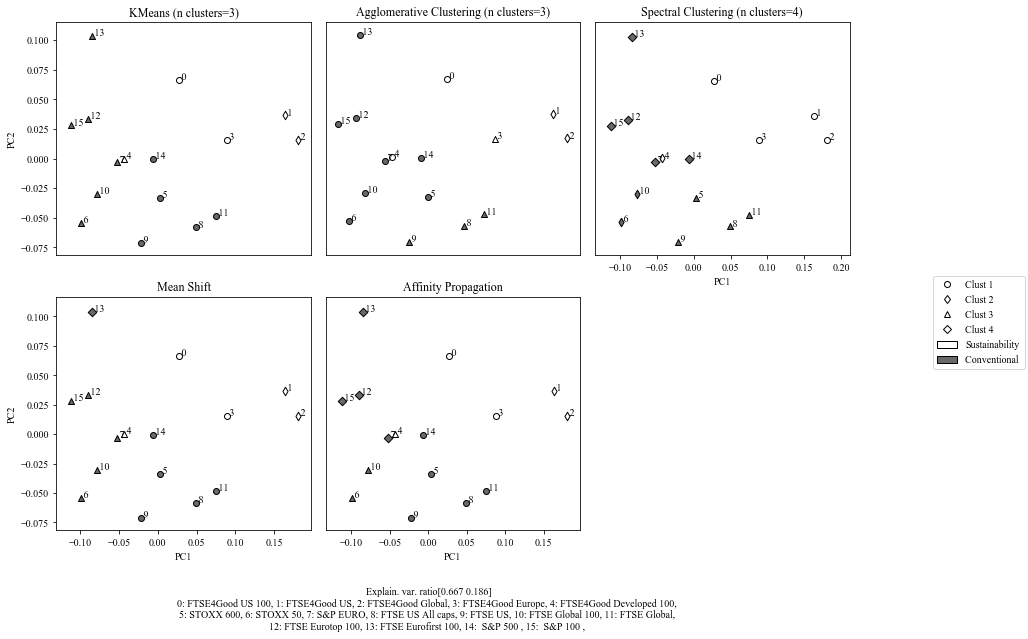

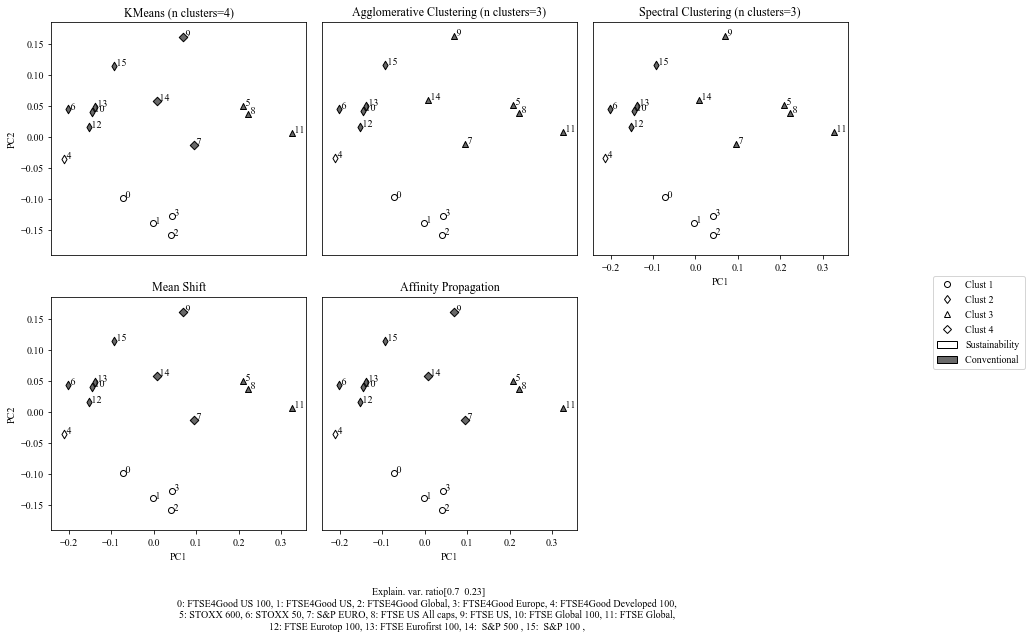

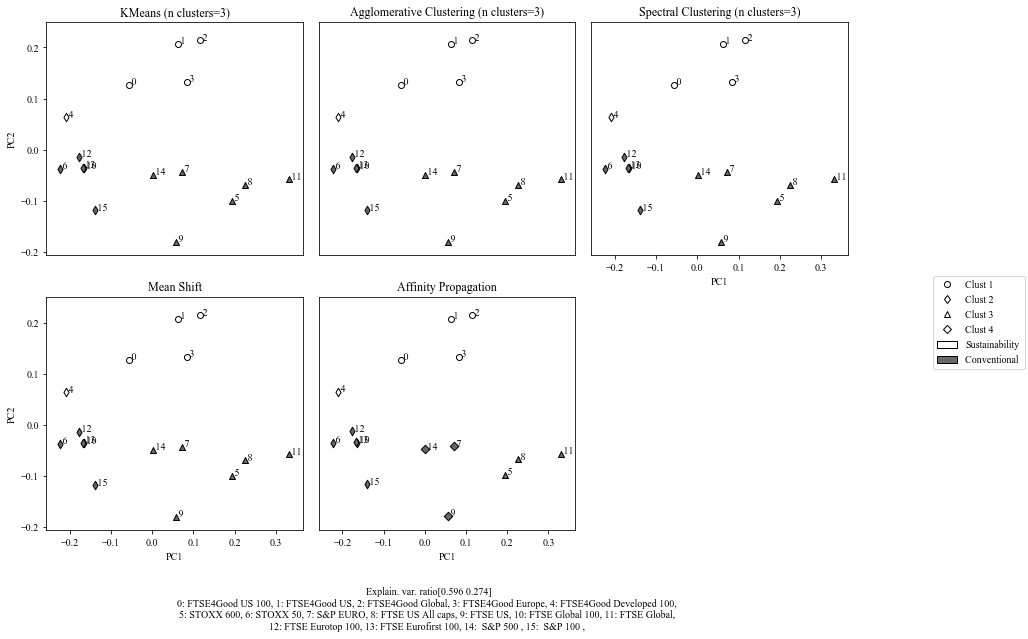

In [13]:
cluster_dict = {"KMeans": KMeans(n_clusters=2, init = "random", n_init = 500, max_iter = 300*50),
               "Agglomerative Clustering":AgglomerativeClustering(n_clusters = 2),
               "Spectral Clustering" : SpectralClustering( n_init = 10*50),
               "Mean Shift": MeanShift(),
               "Affinity Propagation":AffinityPropagation(max_iter = 200*50, convergence_iter = 15*50)
               }

pp = PdfPages(r"C:\Users\pvilas\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Figure 2-4 Clusters plots.pdf")
writer = pd.ExcelWriter(r"C:\Users\pablo\OneDrive - unizar.es\Artículo 1\6.1. Tablas y figuras Artículo\Clustering Tabla A1, A2, A3.xlsx", 
                        engine='xlsxwriter')
plt.rcParams['font.family']="Times New Roman"
plt.rcParams['pdf.fonttype'] = 42

variables = [list(range(1,7)), list(range(1,7)), list(range(1,13))]
plot_restrictions ={1 :[["FTSE4Good US 100","FTSE4Good US","FTSE4Good Europe","FTSE4Good Global"]],
                   2: [["FTSE4Good US 100", "FTSE4Good Europe"],["FTSE4Good US","FTSE4Good Global"]],
                   3: [["FTSE4Good US","FTSE4Good Global"]]
                    }

for hoja in range(0, 3):
    data= list_df[hoja].reset_index().copy()

    (fig, resultados) = clusterplot(
            variables_col=variables[hoja], data=data, cluster_dict=cluster_dict, col_color_group="IndexType",
            n=2, N=5, ncol_v=3,label_text =True, PCA_near=True, label_desc=True, PCA2=True, ID_column ="IndexTicker" ,
            plot_restrictions=plot_restrictions, repeat_clust = False, label_sort= "IndexType",  colors =["white", "dimgrey"])
    
    plt.savefig(pp, format= "pdf", dpi = 1200,bbox_inches='tight')
    resultados.to_excel(writer, sheet_name = "clusters A" + str(1 + hoja))
    
writer.save()
pp.close()

In [82]:
data

,IndexTicker,EsgScoreExclusionsMean,EsgScoreExclusionsVar,CombinedScoreExclusionsMean,CombinedScoreExclusionsVar,MarketValueUsdExclusionsMean,MarketValueUsdExclusionsVar,IndexType
15,STOXX 600,0.335832,0.064170,0.423041,0.085547,0.105649,0.029325,Conventional
14,STOXX 50,0.447945,0.069174,0.483023,0.089036,0.052631,0.007240,Conventional
13,S&P EURO,0.349407,0.060540,0.479719,0.104037,0.077232,0.022961,Conventional
3,FTSE4Good US 100,0.336561,0.075494,0.513496,0.101236,0.176796,0.063725,ASustainability
2,FTSE4Good US,0.318309,0.075104,0.423614,0.086112,0.281390,0.081387,Conventional
0,FTSE4Good Global,0.307368,0.072387,0.392509,0.079381,0.281659,0.081575,Conventional
4,FTSE4Good Europe,0.283986,0.071084,0.419968,0.077938,0.183786,0.062140,ASustainability
1,FTSE4Good Developed 100,0.390313,0.075001,0.494206,0.100545,0.102074,0.037179,Conventional
8,FTSE US All caps,0.358860,0.063873,0.391760,0.081195,0.136631,0.070117,Conventional
7,FTSE US,0.303145,0.059816,0.382796,0.084358,0.047260,0.016782,ASustainability


In [76]:
data

,IndexTicker,EsgScoreExclusionsMean,EsgScoreExclusionsVar,CombinedScoreExclusionsMean,CombinedScoreExclusionsVar,MarketValueUsdExclusionsMean,MarketValueUsdExclusionsVar,EsgScoreInclusionsMean,EsgScoreInclusionsVar,CombinedScoreInclusionsMean,CombinedScoreInclusionsVar,MarketValueUsdInclusionsMean,MarketValueUsdInclusionsVar,IndexType
15,STOXX 600,0.335832,0.064170,0.423041,0.085547,0.105649,0.029325,0.532613,0.079816,0.539404,0.078986,0.738075,0.015297,Conventional
14,STOXX 50,0.447945,0.069174,0.483023,0.089036,0.052631,0.007240,0.854621,0.015024,0.500108,0.072092,0.986280,0.000074,Conventional
13,S&P EURO,0.349407,0.060540,0.479719,0.104037,0.077232,0.022961,0.605701,0.078064,0.655407,0.076626,0.828699,0.005877,Conventional
3,FTSE4Good US 100,0.336561,0.075494,0.513496,0.101236,0.176796,0.063725,0.794467,0.037210,0.664707,0.059261,0.867042,0.010190,ASustainability
2,FTSE4Good US,0.318309,0.075104,0.423614,0.086112,0.281390,0.081387,0.771608,0.049726,0.683771,0.070948,0.793973,0.038404,Conventional
0,FTSE4Good Global,0.307368,0.072387,0.392509,0.079381,0.281659,0.081575,0.754350,0.053408,0.688940,0.070115,0.748799,0.041959,Conventional
4,FTSE4Good Europe,0.283986,0.071084,0.419968,0.077938,0.183786,0.062140,0.725384,0.052702,0.688146,0.070127,0.776260,0.025361,ASustainability
1,FTSE4Good Developed 100,0.390313,0.075001,0.494206,0.100545,0.102074,0.037179,0.878839,0.020960,0.595267,0.057314,0.978189,0.000348,Conventional
8,FTSE US All caps,0.358860,0.063873,0.391760,0.081195,0.136631,0.070117,0.527075,0.074720,0.550772,0.083561,0.728119,0.052677,Conventional
7,FTSE US,0.303145,0.059816,0.382796,0.084358,0.047260,0.016782,0.538626,0.086922,0.536251,0.090496,0.940609,0.010473,ASustainability


<body> <p  style = "font-family:georgia,garamond,serif;font-size:16px;text-align:justify"></body>
All ticks in axis are the same because the PCA to represent the graph is the same. The differences appears in the clustering groups. <br>
def clusterplot(variables_col,data, ID_column,cluster_dict,col_color_group=None, n=2, N=4, ncol_v=3, PCA2=True, PCA3=False, 
                PCA_near=False, label_text =True, label_desc=True,plot_restrictions=[],
               colors =["dimgrey","white", "red","orange","gold", "yellow","cyan","lime","dodgerblue","slateblue","violet","pink"],
               markers = ["d","o", "^", "D","s","<",">","v","8","p","*","x"]):

<body> <p  style = "font-family:georgia,garamond,serif;font-size:16px;text-align:justify"></body>
To plot different results from different clustering algorithms 
<body> <p  style = "font-family:georgia,garamond,serif;font-size:16px;text-align:justify"></body>
<b>clusterplot</b> (variables_col, data, cluster_dict, ID_column, col_color_group=None, n=2, N=4, ncol_v=3, PCA2=True, PCA3=False, PCA_near=False, label_text =True, label_desc=True, label_sort="ID_column",plot_restrictions=[], colors = ["dimgrey", "white", "red", "orange", "gold", "yellow", "cyan", "lime", "dodgerblue", "slateblue", "violet", "pink"], markers = ["d", "o", "^", "D", "s", "<", ">", "v", "8", "p", "*", "x"]) <br>
<br>
<b>Parameters :</b> 
<ul style = "font-family:georgia,garamond,serif;font-size:16px;text-align:justify">
    <li><dt><strong>variables_col: <i>list</i></strong></dt>
        <dd> Input variable; numeric or string with the names of your columns that will be used to perform the clustering algorithms. </dd></li>
    <li><dt><strong>data: <i>DataFrame</i> </strong></dt>
        <dd>Tidy (“long-form”) DataFrame where each column is a variable and each row is an observation/data point.
        </dd></li>  
    <li><dt><strong>cluster_dict : <i>dictionary</i></strong></dt> 
       <dd>Each key will be the title of the plot and the name of the column results of the DataFrame. Each value should be the scikit-learn clustering formula to perform.
        </dd> </li>    
    <li><dt><strong>ID_column : <i>string</i></strong></dt> 
       <dd> Name of the column that identify your observations/data points. If empty it will be used the index of the DataFrame
        </dd> </li>
    <li><dt> <strong>col_color_group : <i>string optional</i></strong> </dt>
        <dd>DataFrame column, if your observations belongs to different groups and you want to plot these groups with different colors. 
        </dd></li>    
    <li><dt><strong>n : <i>integer optional</i></strong></dt> 
        <dd>Minimum number of clusters returned in those clustering algorithms where is necessary to define the number of groups, default 2  
    </dd></li>
    <li><dt><strong>N : <i>integer optional</i></strong></dt> 
        <dd>Maximum number of clusters returned in those clustering algorithms where is necessary to define the number of groups, default 5
        </dd></li>  
    <li> <dt><strong>ncol_v: <i>int optional </i></strong></dt>
        <dd>Number of columns in the figure, default = 3
        </dd></li>
    <li> <dt><strong>label_text=True : <i>bool optional </i></strong></dt>
        Plot labels to the data points in the figure.    
        <dd></dd></li>
    <li> <dt><strong>label_desc=True : <i>bool optional </i></strong></dt>
        Print the variance ratio of the PCA under the figure and if <code>label_text = True </code> also the name of the data points, default True    
        <dd></dd></li>    
    <li> <dt><strong>label_sort : <i>string</i></strong></dt>
        Orde the dataframe by column, order to assign the number labels to the data points, options: Default, "PCA2"  
        <dd></dd></li>    
    <li> <dt><strong>plot_restrictions : <i>dictionary </i></strong></dt>
        dictionary with restrictions to plot only those clustering techniques that find a cluster with certain restrictions, default None
        <dd></dd></li>    
    <li><dt><strong>repeat_clust : <i>bool optional</i></strong></dt>
        <dd> Plot only the first "n" that comply with the restrictions of "plot_restrictions", default True
        </dd></li>
    <li> <dt><strong>subplot_size: <i>list </i></strong></dt>
        size of the figure, default [4,4]    
        <dd></dd></li>   
   <li><dt><strong>colors : <i>list</i></strong></dt>
        <dd> list with the colors to use in the figure, default colors =["dimgrey","white", "red","orange","gold", "yellow", "cyan", "lime", "dodgerblue", "slateblue", "violet", "pink"]
        </dd></li>
    <li> <dt><strong>markers : <i>list </i></strong></dt>
        list with the markers to use in the figure, defaul markers = ["d","o", "^", "D","s","<",">","v","8","p","*","x"]    
        <dd></dd></li>


In [2]:
def clusterplot(variables_col,data, cluster_dict, ID_column = "" ,col_color_group=None, n=2, N=4, ncol_v=3, PCA2=True, PCA3=False, 
            PCA_near=False, label_text =True, label_desc=True, label_sort = "PCA2", plot_restrictions=None, 
                repeat_clust=True, subplot_size =[4,4],
            colors =["dimgrey","white", "red","orange","gold", "yellow","cyan","lime","dodgerblue","slateblue","violet","pink"],
            markers = ["o", "d", "^", "D","s","<",">","v","8","p","*","x"]):

    
    """We create a dictionary with the colors, if there exist a column with objective groups "col_color_group" 
    the code of each color will be the name of the group in col_color_group otherwise the code will be an integer"""
    if bool(col_color_group)==True:
        dict_color=dict(zip(list(set(data[col_color_group])),colors[0:len(pd.unique(data[col_color_group]))]))
    else:
        dict_color=dict(zip(range(0,len(colors)),colors)) 
        
   
    #If ID_column empty use datframe index
    if ID_column =="":
        ID_column="index"
        data[ID_column]= data.index.to_list()

    """FIRST PART OF THE FUNCTION, IN THIS PART WE FIT THE CLUSTER 
    GROUPS AND WE INTRODUCE THE RESULTS OF EACH CLUSTER IN A DATAFRAME """

    """ We select the necessary column to fit the cluster, if the list passed is composed by integers
    use ".iloc" else ".loc" """
    if (variables_col[0] == str)==False: #integer list or string list
        variables_tocluster = data.iloc[:,variables_col] #integer list
    else:
        variables_tocluster = data.loc[:,variables_col] # string list
        
    """PCA2 FIT --> X axis=PCA1 Y axis=PCA2"""
    if PCA2 == True: #Principal components reduction
        pca2=PCA(n_components= 2)
        pca2.fit(variables_tocluster)
        """DataFrame to save the results of each clustering and PCA=2 values,
        This Dataframe is create wiht the ID_Column and PCA values affter we will add the results of each clustering"""
        df_pca2_results= pd.concat([pd.DataFrame({ID_column: data[ID_column].to_list()}),pd.DataFrame(pca2.transform(variables_tocluster))],
              axis=1)
        # If col_color_group is not empty we add this column to DataFrame results else we add an empty column
        if bool(col_color_group)== True: 
            df_pca2_results[col_color_group]=data[col_color_group].to_list()
        else:
            df_pca2_results[col_color_group]=""
        #Rename the PCA columns
        df_pca2_results.rename(columns={0:"PCA1",1:"PCA2"}, inplace=True)
        #Explained Variance Ratio, if label_desc=True we add this information in the description plot
        pca2_ratio =pca2.explained_variance_ratio_
    #PCA 3 
    if PCA3 == True:
        pca3=PCA(n_components= 3)
        pca3.fit(variables_tocluster)
        df_pca3_data=pd.concat([pd.DataFrame({ID_column: data[ID_column].to_list()}),pd.DataFrame(pca2.transform(variables_tocluster))],
              axis=1)
        pca3_ratio =pca2.explained_variance_ratio_
        
    """LOOP FOR EACH CLUSTER DEFINED IN THE DICT "clust_dict" """   
    for clust in cluster_dict:
        # if the cluster algorithms have the attribute n_cluster we make n to N clusters if n and N are defined
        if "n_clusters" in dir(cluster_dict[clust]) and n!= 0 and N!=0: 
            rep = N
        else: rep=n #otherwise we only calcule one cluster
            
        for group in range(n,rep +1):
            #title of the algorithm, title wewill appears in each subplot and in the DataFrame
            if "n_clusters" in dir(cluster_dict[clust]) and n!= 0 and N!=0 :
                cluster_dict[clust].n_clusters = group # We change the number of groups to compute
                title = clust+" (n clusters="+str(group)+")"
            else:title = clust 
            #We select the cluster type according to loop for clust
            cluster_type = cluster_dict[clust] 
            #we fit the cluster
            cluster_type.fit(variables_tocluster)
            # We add the labels group to the DATAFRAME cluster results
            df_pca2_results[title] = cluster_type.labels_


    """SECOND PART OF THE FUNCTION WE PLOT THE CLUSTER RESULTS 
    DEPENDING ON "plot_restrictions", repeat_clust and "col_color_group" """


    max_ngroup=0    # Max Number of groups in cluster is necessary to create the overall legend
    num_subplots =0 # Number of sulplots to create
    clust_toplot=[] # list with the title of the clustering that we will plot
    footer = "" # string with the description of each label text
    cont_footer=1 # to place correctly the description in the figure
    n_letters = 0 # to define the number of lines of the figure description

    # Sort the DaraFrame by Y column "PCA1", "PCA2", "ID_column" , "col_color_group"
    df_pca2_results.sort_values(by=[label_sort, ID_column],inplace=True,ascending=False,ignore_index=True)
    
    """RESTRICTIONS If there exist restrictions ("plot_restrictions" not empty) we only plot 
    the cluster that comply these restrictions. In this part we define the values of:
    "max_ngroup", "num_subplots", "clust_toplot" """
    if bool(plot_restrictions) ==False:
        for clust in df_pca2_results.columns.to_list()[4:]:
            clust_toplot.append(clust)
            num_subplots+=1 
            ngroups =len(set(df_pca2_results[clust].to_list()))
            max_ngroup =ngroups if ngroups>max_ngroup else max_ngroup
    else:
        # We check the restrictions in "plot_restrictions" and "repeat_clust"
        for clust in df_pca2_results.columns.to_list()[4:]:
            
            # If "repeat_clust == True" we only plot the first cluster method that comply the restricctions with less groups
            if repeat_clust==False and len(clust_toplot)>0:
                if clust_toplot[-1].find(" (n clusters=")!=-1 and clust.find(" (n clusters=") !=-1 and (
                clust_toplot[-1][0:clust_toplot[-1].find(" (n clusters=")]==clust[0:clust.find(" (n clusters=")]):  
                    continue
            """ We check the restrictions in the dict "plot_restrictions" to plot only the plots we are interesting
            The list in the same key are "and" and the different keys are "or" """
            for rest in plot_restrictions:
                cont_rest=0 #count that all the restrictions in key are okey
                for list_rest in plot_restrictions[rest]:
                    df_plot= df_pca2_results[df_pca2_results[ID_column].isin(list_rest)]
                    list_= df_plot[clust].to_list()
                    #All categories in plot_restrictions are the same and the are not any intruder
                    if list_.count(list_[0])==len(list_)==len(df_pca2_results[clust][df_pca2_results[clust]==list_[0]]):
                            cont_rest+=1
                if cont_rest == len(plot_restrictions[rest]):
                    ngroups =len(set(df_pca2_results[clust].to_list()))
                    max_ngroup =ngroups if ngroups>max_ngroup else max_ngroup
                    clust_toplot.append(clust)
                    num_subplots+=1
                    break
                
    """SUBPLOT We define the structure of the figure following the defined attribute 
        in the fuction "Ncol_v", "nrow_v" --> rows of the figure """
    #We define the dimension of the figure
    nrow_v = num_subplots//ncol_v +(0 if num_subplots%ncol_v==0 else 1)
    if nrow_v==1 and num_subplots%ncol_v !=0 : ncol_v= num_subplots%ncol_v
    fig2, axes2 = plt.subplots(nrows=nrow_v, ncols=ncol_v, figsize=(subplot_size[0]*ncol_v,subplot_size[1]*nrow_v))
    # We remove the subplots that exceed the subplots that we need  
    if num_subplots%ncol_v !=0: 
        for c in range( num_subplots%ncol_v, ncol_v): 
            fig2.delaxes(axes2[nrow_v-1, c])
            

    """WE PLOT THE RESULTS OF EACH CLUSTER in "clust_toplot" """        
    # loop for each cluster to plot the results in each ax/subplot, cont_plot is used to the axis_ticks
    for ax2, clust, cont_plot in zip(axes2.flatten() if type(axes2) == np.ndarray else [axes2], clust_toplot, range(0,len(clust_toplot))):       
        ax2.set_title(clust) # We put the subplot title
        
        # We scatter each cluster group with different markes
        for x, cont_marker in zip (pd.unique(df_pca2_results[clust]), range(0,len(pd.unique(df_pca2_results[clust])))):
            df_plot_marker=df_pca2_results[df_pca2_results[clust] == x].loc[:,[ID_column,col_color_group, clust, "PCA1","PCA2"]]
            # We sort by clust ascending
            df_plot_marker.sort_values(by=clust,inplace=True,ascending=True,ignore_index=True)
            """ If "col_color_group" is defined we scatter the cluster groups with different colors 
            depending on the number groups that exist in "col_color_group" """
            # If we have col_color_group the color of each markers would be different depending on the group
            if bool(col_color_group)==True:
                # different colors for the same markers following "col_color_group"
                cont_color=0
                for col_g in pd.unique(df_plot_marker[col_color_group]):
                    df_plot_color=df_plot_marker[df_plot_marker[col_color_group] == col_g].loc[:,
                    [ID_column,col_color_group, clust, "PCA1","PCA2"]]
                    ax2.scatter(df_plot_color["PCA1"],df_plot_color["PCA2"], c = dict_color[col_g], edgecolor="black",
                                marker = markers[cont_marker])
                    cont_color+=1    
                # Otherwise We only draw different markers with same color
            else:
                ax2.scatter(df_plot_marker["PCA1"],df_plot_marker["PCA2"],c =dict_color[cont_marker], 
                            marker = markers[cont_marker])
        
        # The ticks of the axis, only appears the exterior ticks     
        if cont_plot%ncol_v==0: 
            ax2.set(ylabel="PC2")
        else: ax2.get_yaxis().set_visible(False)  
        if cont_plot >= (num_subplots-ncol_v):     
            ax2.set(xlabel="PC1")
        else: ax2.get_xaxis().set_ticks([])#  set_visible(False)   
                                                                          
        # If true we put in the subplot the labels of each ID  
        if label_text == True:
            for label, x, y in zip(df_pca2_results.index.to_list(), df_pca2_results.loc[:, "PCA1"], 
            df_pca2_results.loc[:, "PCA2"]):
                ax2.text(x,y,s=" " + str(label))
                
                # if "label_desc == True" and we are in the last subplot we create the descripton of each label text
                if label_desc == True and cont_plot == num_subplots -1:
                    footer += str(label)+": " + str(df_pca2_results.at[label,ID_column]) +", "
                    n_letters+= len(str(label)+": " + str(df_pca2_results.at[label,ID_column]) +", ")
                if  n_letters>ncol_v*35:
                    footer+="\n"
                    n_letters=0
                    cont_footer+=1
                                                                          
    
    """WE ADD THE LEGEND AND SOME DESCRIPTION OF THE PLOT"""                                                                      
    ### We add the descriptions of the labels if True /cont_footer = number lines of the legend
    if label_desc == True: 
        value_adjs = -0.16 if num_subplots== 1 else -0.06
        footer = "Explain. var. ratio" + str(np.around(pca2_ratio,3))+ "\n" + footer
        fig2.text(.5, +nrow_v*0.01 + value_adjs -0.02*cont_footer, footer, ha='center')                

    # We put the groups in the legend            
    legend_elements=[]
    width_legend = (0.4 if num_subplots== 1 else 0.14)
    if bool(col_color_group)==True:
        for g in range(1, max_ngroup+1):  
            legend_elements.append(Line2D([0], [0], marker=markers[g-1],  markerfacecolor="w", markeredgecolor="black", 
                                       color = "w",label='Clust ' + str(g)))    
        for g in pd.unique(df_pca2_results[col_color_group]):
            legend_elements.append( Patch(facecolor=dict_color[g], edgecolor="black", label=g))

            width_legend = max(width_legend, len(g)*0.013)
    else:
        for g in range(1, max_ngroup+1):  
            legend_elements.append(Line2D([0], [0], marker=markers[g-1],  markerfacecolor=dict_color[g-1], 
            markeredgecolor=dict_color[g-1], color = "w",label='Clust ' + str(g))) 
            
    ### We add legend
    fig2.legend(handles=legend_elements, loc="center right",bbox_to_anchor=(1.01,0.5, width_legend, 0.1)) # fig2.tight_layout() borderaxespad=-0
    fig2.tight_layout()
    
    return fig2, df_pca2_results

In [89]:
colors =["dimgrey","white", "red","orange","gold", "yellow","cyan","lime","dodgerblue","slateblue","violet","pink"]  
markers = ["d","o", "^", "D","s","<",">","v","8","p","*","x"] #https://matplotlib.org/3.1.1/api/markers_api.html

data=data
n=3 # cluster = n to N
N=4
ID_column ="ID" #Column 
variables_col=list(range(1, 7)) #List with names of the columns with the variables
ncol_v =3 #Maximun number of columns by row
PCA2= True #If true the plot is in 2D
PCA3= False #If true the plot is in 3D
PCA_near = True #If true 2D is ploted near 3D
#Dict with the clustering algorithms to plot
cluster_dict = {"KMeans": KMeans(n_clusters=n, init = "random", n_init = 500, max_iter = 300*50),
               "AgglomerativeClustering":AgglomerativeClustering(n_clusters = n),
               "MeanShift": MeanShift(),
               "AffinityPropagation":AffinityPropagation(max_iter = 200*50, convergence_iter = 15*50),
               "SpectralClustering" : SpectralClustering( n_init = 10*50)}

col_color_group="index_type"


# plot_restrictions =["FTSE4Good US 100","FTSE4Good US","FTSE4Good Europe","FTSE4Good Global"]
label_text =True #Plot the ID of each observation in the clustering representation


plot_restrictions=set(plot_restrictions)
cluster_dict_keys=list(cluster_dict.keys()) #list with dictionary keys